In [13]:
# Cargar Dataset
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Para reportes de clasificación
from sklearn.metrics import classification_report
# Matrices de confsion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# Cargar el dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Guardamos el frame
df = pd.DataFrame(X, columns=iris.feature_names)
print("Antes: \n", df)

# Para prerpocesar. Primeramente escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir a DataFrame para mejor visualización
X_scaled_df = pd.DataFrame(X_scaled, columns=iris.feature_names)

# Mostrar primeras filas después de estandarizar
print("\nDespués de estandarizar:")
print(X_scaled_df.head())

Antes: 
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

Después de estandarizar:
   se


📋 Reporte de clasificación (kernel='linear'):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


📋 Reporte de clasificación (kernel='poly'):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



/home/alan/coding/gitrepos/Python/Sistemas Inteligentes/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/alan/coding/gitrepos/Python/Sistemas Inteligentes/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/alan/coding/gitrepos/Python/Sistemas Inteligentes/venv/lib/python3.11/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^


📋 Reporte de clasificación (kernel='rbf'):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/home/alan/coding/gitrepos/Python/Sistemas Inteligentes/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/alan/coding/gitrepos/Python/Sistemas Inteligentes/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/alan/coding/gitrepos/Python/Sistemas Inteligentes/venv/lib/python3.11/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^

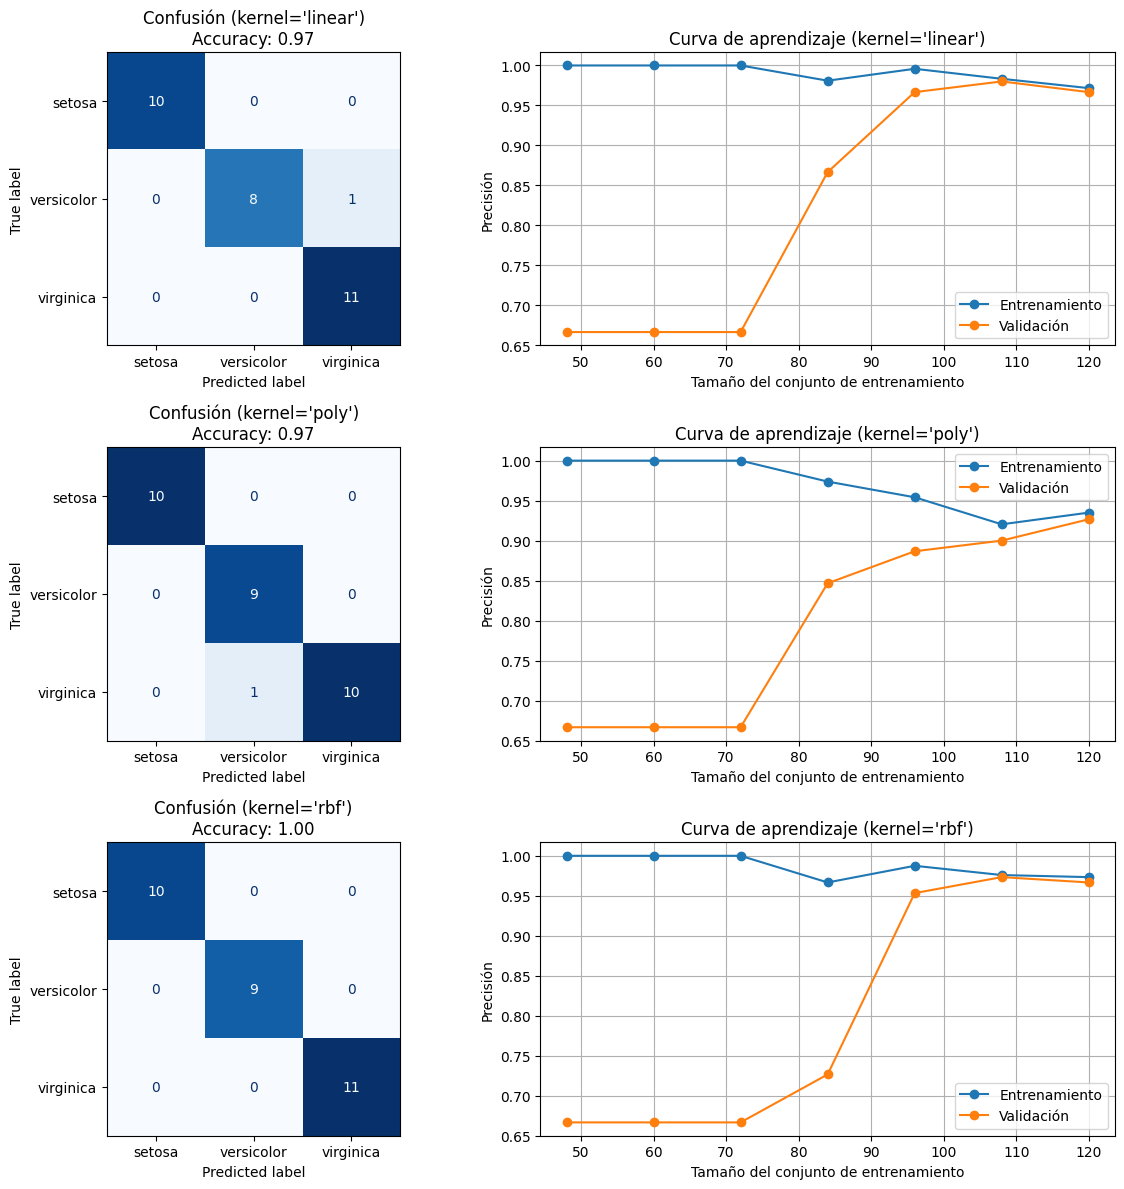

In [15]:
# 2. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Estandarizar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X)

# 4. Definir kernels a evaluar
kernels = ['linear', 'poly', 'rbf']

# 5. Inicializar figura
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

for i, kernel in enumerate(kernels):
    # Entrenar modelo
    svm = SVC(kernel=kernel)
    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)

    # Reporte de clasificación
    print(f"\n📋 Reporte de clasificación (kernel='{kernel}'):")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
    disp.plot(ax=axes[i, 0], cmap='Blues', colorbar=False)
    acc = accuracy_score(y_test, y_pred)
    axes[i, 0].set_title(f"Confusión (kernel='{kernel}')\nAccuracy: {acc:.2f}")

    # Curva de aprendizaje
    train_sizes, train_scores, val_scores = learning_curve(
        SVC(kernel=kernel), X_scaled, y, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
    )

    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    axes[i, 1].plot(train_sizes, train_mean, 'o-', label='Entrenamiento')
    axes[i, 1].plot(train_sizes, val_mean, 'o-', label='Validación')
    axes[i, 1].set_title(f"Curva de aprendizaje (kernel='{kernel}')")
    axes[i, 1].set_xlabel("Tamaño del conjunto de entrenamiento")
    axes[i, 1].set_ylabel("Precisión")
    axes[i, 1].legend()
    axes[i, 1].grid(True)

plt.tight_layout()
plt.show()


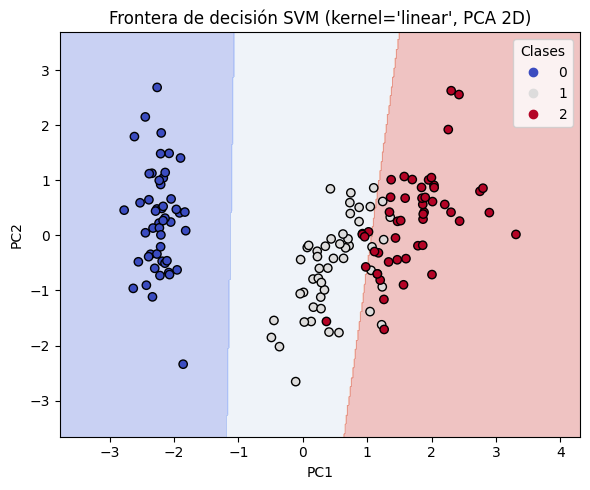

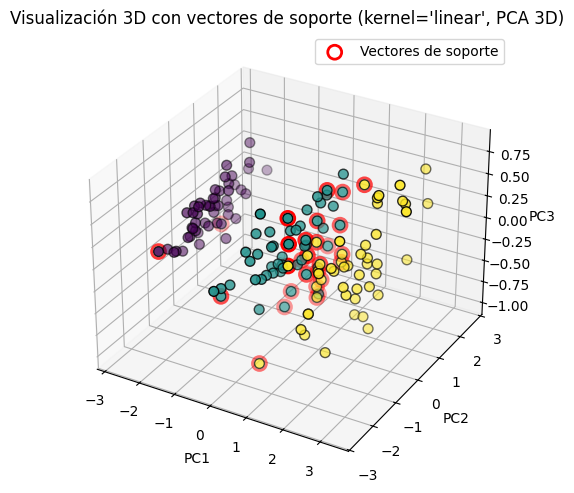

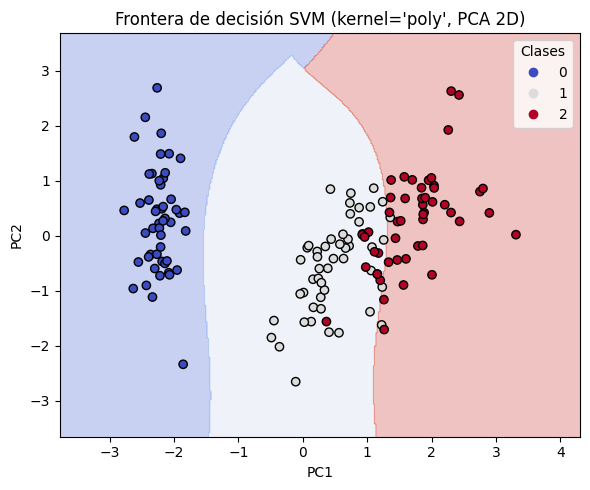

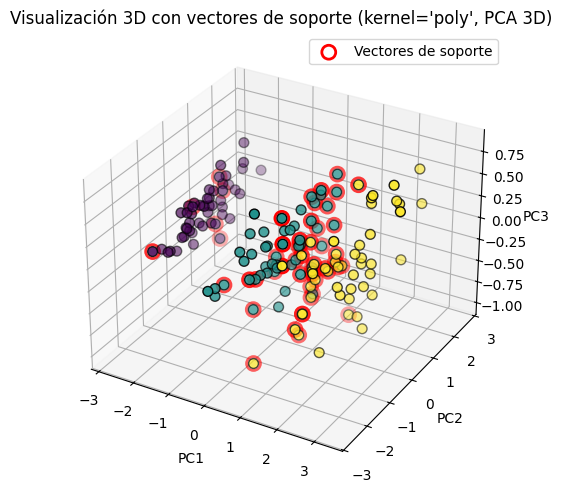

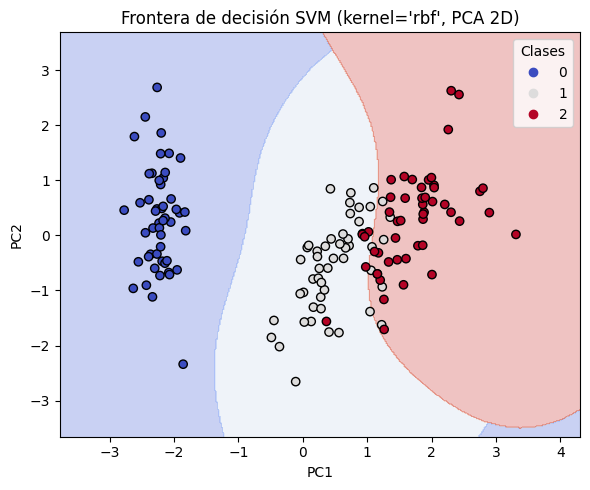

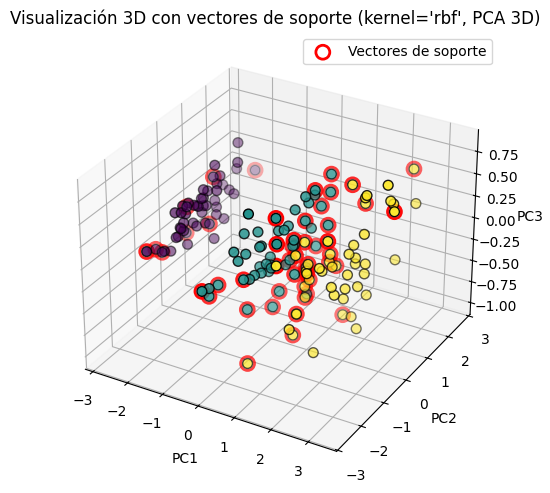

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC

# Suponemos que ya existen:
#   kernels = ['linear', 'poly', 'rbf']
#   X_scaled, y (definidos en el bloque anterior)

# Función para graficar frontera de decisión en 2D
def plot_decision_boundary_2d(model, X, y, kernel_name):
    h = 0.02  # paso del grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    scatter = plt.scatter(
        X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k'
    )
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(f"Frontera de decisión SVM (kernel='{kernel_name}', PCA 2D)")
    plt.legend(*scatter.legend_elements(), title="Clases")
    plt.tight_layout()
    plt.show()


for kernel in kernels:
    # -------------------------
    # 1. PROYECCIÓN 2D + SVM 2D
    # -------------------------
    pca_2d = PCA(n_components=2)
    X_2d = pca_2d.fit_transform(X_scaled)

    svm_2d = SVC(kernel=kernel)
    svm_2d.fit(X_2d, y)

    plot_decision_boundary_2d(svm_2d, X_2d, y, kernel)

    # -------------------------
    # 2. PROYECCIÓN 3D + SVM 3D
    # -------------------------
    pca_3d = PCA(n_components=3)
    X_3d = pca_3d.fit_transform(X_scaled)

    svm_3d = SVC(kernel=kernel)
    svm_3d.fit(X_3d, y)

    support_vectors_3d = svm_3d.support_vectors_

    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(
        X_3d[:, 0], X_3d[:, 1], X_3d[:, 2],
        c=y, cmap='viridis', s=50, edgecolor='k'
    )
    ax.scatter(
        support_vectors_3d[:, 0],
        support_vectors_3d[:, 1],
        support_vectors_3d[:, 2],
        s=100, facecolors='none', edgecolors='r',
        linewidths=2, label='Vectores de soporte'
    )
    ax.set_title(f"Visualización 3D con vectores de soporte (kernel='{kernel}', PCA 3D)")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.legend()
    plt.tight_layout()
    plt.show()



In [17]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

# Supongamos que ya tienes estos objetos definidos de bloques anteriores:
# kernels = ['linear', 'poly', 'rbf']
# X_train_scaled, X_test_scaled, y_train, y_test, X_scaled, y

# Creamos un diccionario para almacenar las métricas de cada modelo
metrics = {
    'kernel': [],
    'accuracy': [],
    'f1_macro': [],
    'n_support_vectors': [],
    'avg_margin': []  # usaremos avg_margin como proxy numérico de "claridad de frontera"
}

for kernel in kernels:
    # 1. Entrenar el modelo SVM con el kernel actual
    svm = SVC(kernel=kernel)
    svm.fit(X_train_scaled, y_train)
    
    # 2. Calcular precisión y F1-score promedio (macro) sobre el conjunto de prueba
    y_pred = svm.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # 3. Número de vectores de soporte
    n_sv = len(svm.support_vectors_)
    
    # 4. "Claridad de la frontera de decisión" (proxy numérico):
    #    Usamos decision_function sobre todo X_scaled para medir la distancia media al hiperplano.
    #    - En multiclasificación, decision_function devuelve shape (n_samples, n_clases*(n_clases-1)/2).
    #    - Tomamos para cada muestra la distancia absoluta mínima a cualquier hiperplano (más cercana).
    decision_vals = svm.decision_function(X_scaled)
    if decision_vals.ndim > 1:
        # multiclass: la distancia a la frontera es el valor absoluto más pequeño entre todas las salidas
        margin_per_sample = np.min(np.abs(decision_vals), axis=1)
    else:
        # binario: decision_vals ya es un vector
        margin_per_sample = np.abs(decision_vals)
    avg_margin = np.mean(margin_per_sample)
    
    # 5. Guardar métricas
    metrics['kernel'].append(kernel)
    metrics['accuracy'].append(acc)
    metrics['f1_macro'].append(f1)
    metrics['n_support_vectors'].append(n_sv)
    metrics['avg_margin'].append(avg_margin)

# 6. Mostrar el resultado en un DataFrame para comparar
df_metrics = pd.DataFrame(metrics)
print(df_metrics)


   kernel  accuracy  f1_macro  n_support_vectors  avg_margin
0  linear  0.966667  0.965899                 26    0.274180
1    poly  0.966667  0.966583                 46    0.262046
2     rbf  1.000000  1.000000                 46    0.212977
